In [1]:
import numpy as np
from skimage import segmentation, color
from skimage.segmentation import quickshift
from skimage.future import graph
from matplotlib import pyplot as plt
import cv2
from tqdm import tqdm_notebook as tqdm
import math

In [2]:
path_img = "home.jpg"
img = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)

In [3]:
def plot_images(list_of_images, max_col = 4):
    n = len(list_of_images)
    if n == 1:
        plt.imshow(list_of_images[0]); plt.axis('off'); plt.show()
    else:
        # get number of columns and rows required
        r, c = 1, n
        if n > max_col:
            c = max_col
            r = int(math.ceil(n/max_col))
    
        fig = plt.figure(figsize=(17, max_col * r))
        for i, (img,name) in enumerate(list_of_images):
            ax = fig.add_subplot(r, c, (i+1))
            ax.set_title(str(name))
            ax.axis('off')
            ax.imshow(img)


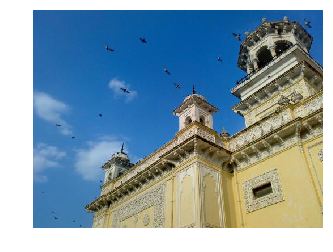

In [4]:
plot_images([img])

# Part A - Normalized Graph-Cut

In [5]:
def normalized_graph_cut(compactness, n_segments, thresh):
    all_img = []

    for comp in compactness:
        for seg in tqdm(n_segments):
            for thr in thresh:
                labels = segmentation.slic(img, compactness=comp, n_segments=seg)
                g = graph.rag_mean_color(img, labels, mode='similarity')
                labels = graph.cut_normalized(labels, g, thr)
                result = color.label2rgb(labels, img, kind='avg')
                all_img.append((result, ("comp: " + str(comp) + ", seg: " + str(seg) + ",thresh: " + str(thr))))
                
    plot_images(all_img)

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

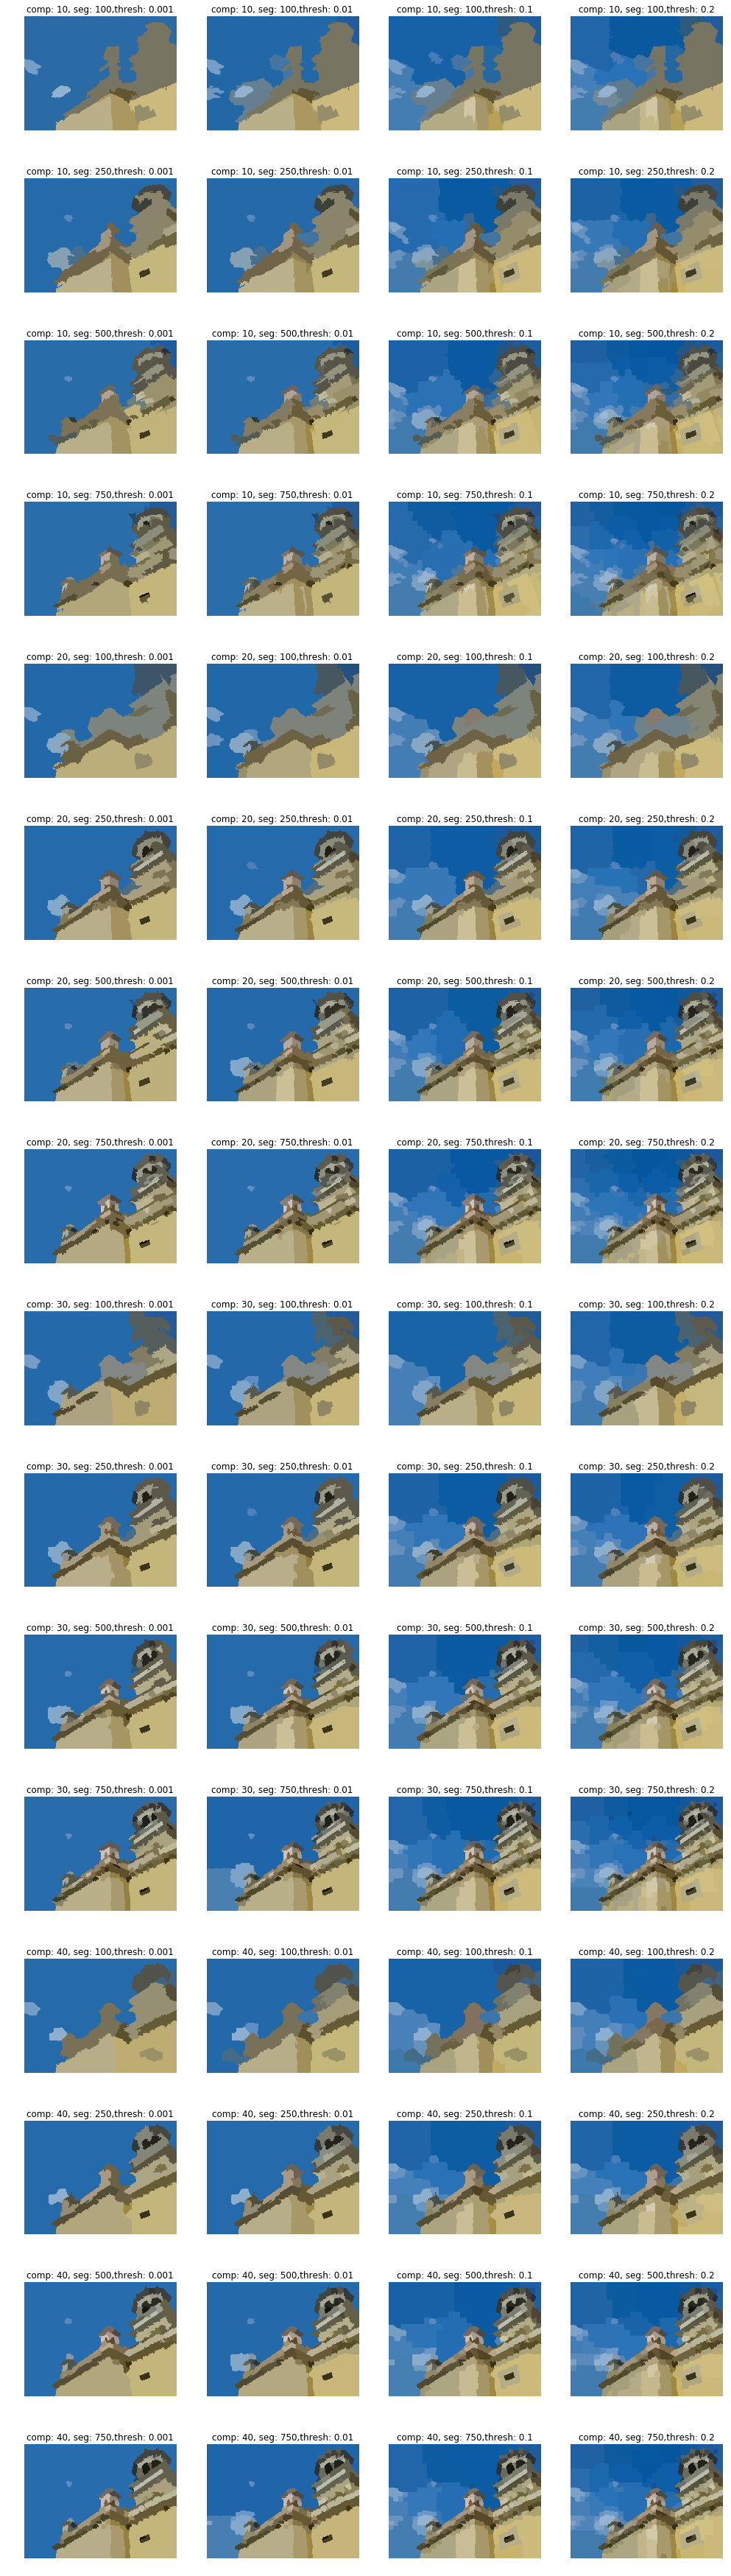

In [6]:
compactness = [10, 20, 30, 40]
n_segments = [100, 250, 500, 750]
thresh = [0.001, 0.01, 0.1, 0.2]

normalized_graph_cut(compactness, n_segments, thresh)

### Effect on the output 
**Compactness**

**Number of segments

# Part B - Mean Shift

In [7]:
def mean_shift(ratio, k_size, max_dist):
    all_img = []

    for r in ratio:
        for s in tqdm(k_size):
            for d in max_dist:
                label = quickshift(img, ratio = r, kernel_size = s, max_dist = d)
                out = color.label2rgb(label, img, kind='avg')
                all_img.append((out, ("ratio: " + str(r) + ", kernel_size: " + str(s) + ", max_dist: " + str(d))))
                
    plot_images(all_img)

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

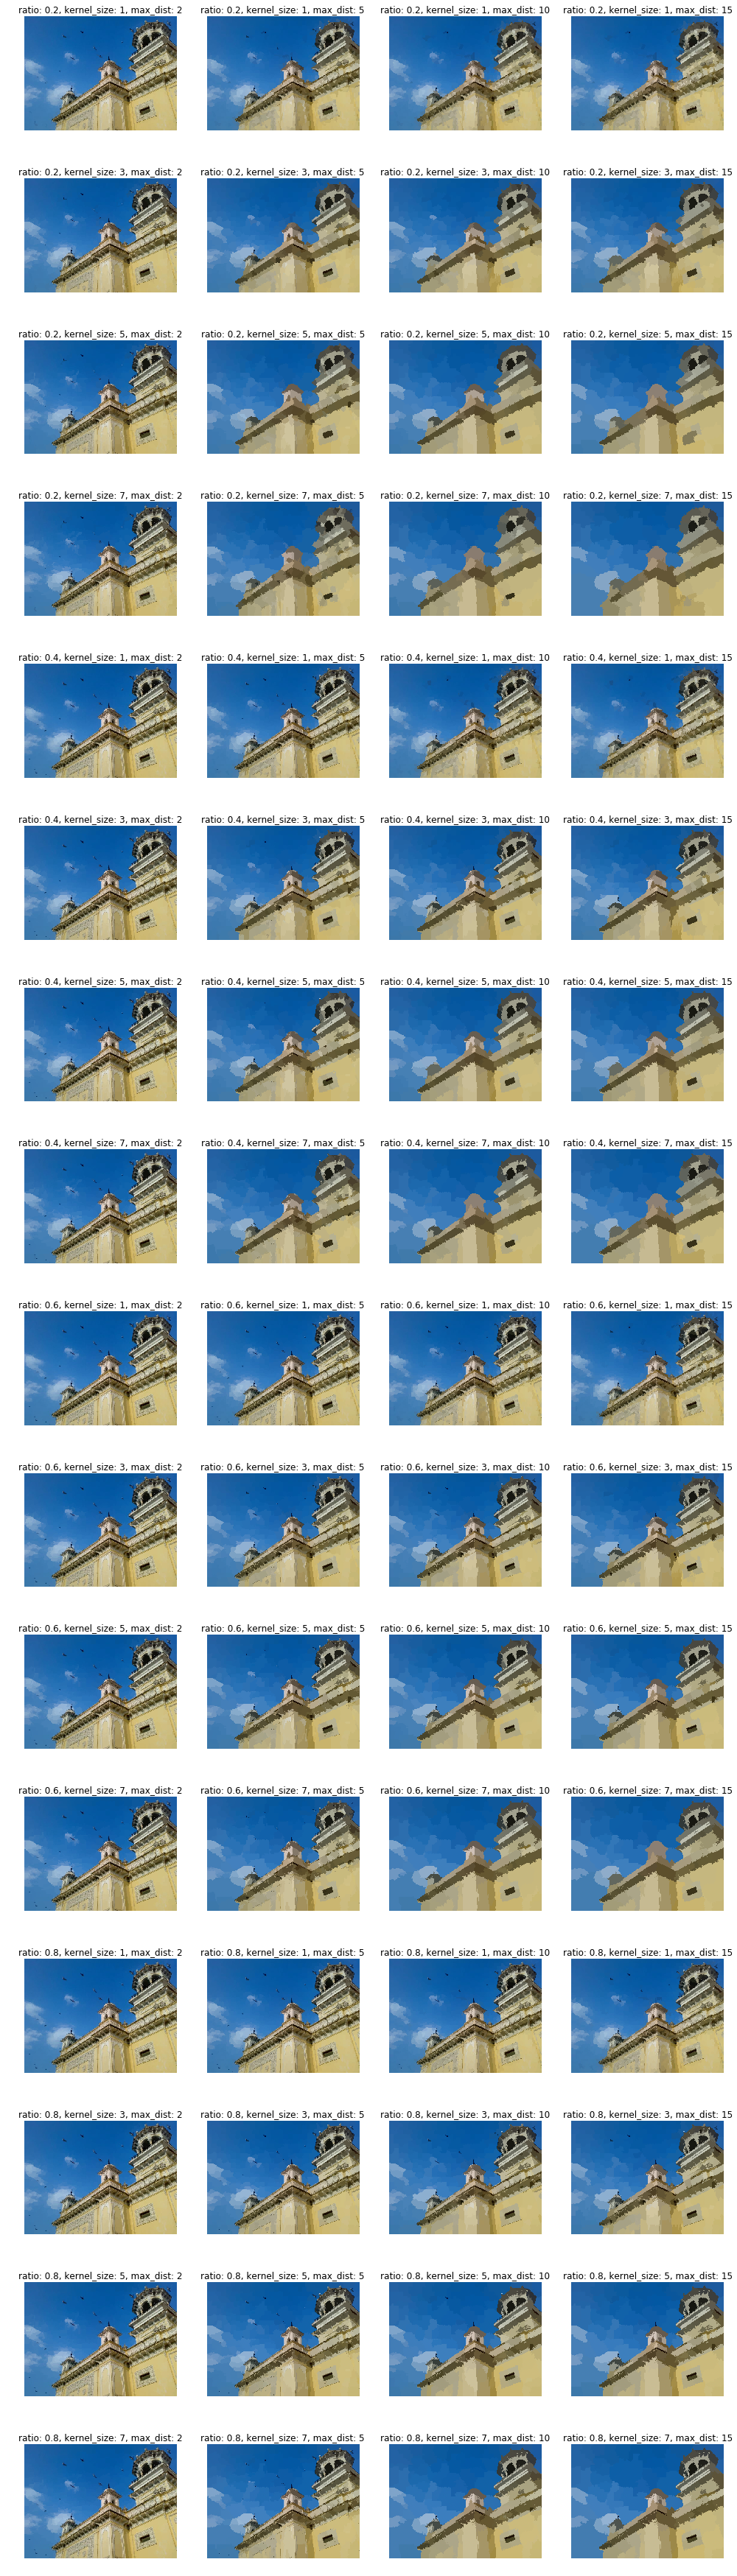

In [8]:
ratio = [0.2, 0.4, 0.6, 0.8]
k_size = [1, 3, 5, 7]
max_dist = [2, 5, 10, 15]

mean_shift(ratio, k_size, max_dist)